In [43]:
import sys
sys.path.append('../')
sys.path.append('../../')

%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_rows', 500)
plt.rcParams['figure.figsize'] = (20.0, 5.0)

import potzy.metadata
from potzy.helpers import *

def compute_ma(df,periods,pcol='Adj Close'):
    """Assume df has date as index"""
    
    df.index.name='Date'
    df_signal = df['ticker'].reset_index()

    for period in periods:
        tmp=df.groupby('ticker')[pcol].rolling(window=period,min_periods=int(period*1.0/2.0)).mean().reset_index()
        tmp.rename(columns={pcol:'ma_'+str(period)},inplace=True)
        df_signal = pd.merge(df_signal,tmp,on=['Date','ticker'])

    return pd.merge(df.reset_index(), df_signal, on=['Date','ticker']).set_index('Date')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
##
price_data_file='/Users/sunny/GoogleDrive/SunnyDoc/StockData/thai_price_all_yahoo_20180310.csv' #not save in github due to 
df = pd.read_csv(price_data_file,index_col=[0])
df.set_index('Date',inplace=True)
df.index = pd.DatetimeIndex(df.index)
df.sort_index(inplace=True)
len(df)

/Users/sunny/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1824110

In [45]:
## get all set50, getall set100, test coverage
s50=potzy.metadata.load_set50_tickers()
s100=potzy.metadata.load_set100_tickers()

set(s50).difference(set(df['ticker'].unique())), set(s100).difference(set(df['ticker'].unique()))

(set(), set())

## Test MA100, EMA100

In [46]:
df = compute_ma(df,periods=[7,17,37,59,113,197])

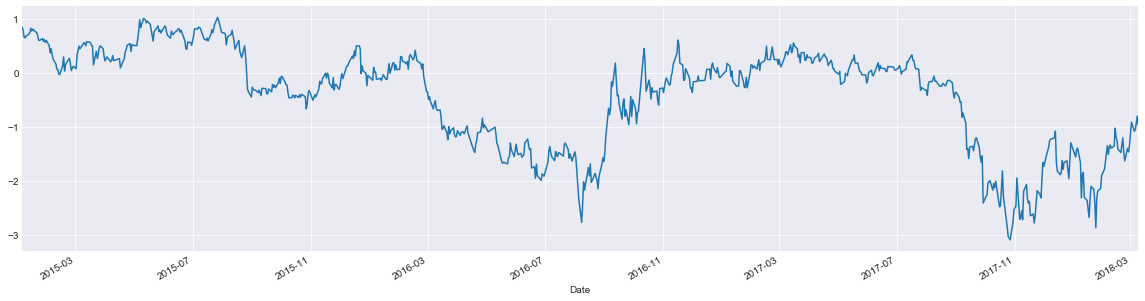

In [77]:
(dfs['ma_113']-dfs['Adj Close']).plot()

In [ ]:
def ma_cross_over(data,time,s_col,p_col):
    prev_signal,signal = data[time-1,s_col],data[time,s_col]
    prev_price, price = data[time-1,p_col],data[time,p_col]
    #condition to position
    if price < signal and prev_price > prev_signal and price < prev_price and position[t-1]> 0:
        position[t]=0
    elif price > signal and prev_price < prev_signal and price > prev_price and position[t-1]<= 0:
        position[t] = int(cash[t-1]/price/100)*100
    else:
        position[t]=position[t-1]
    return pos

def buy_and_hold(data,time,)
    

In [123]:
ticker='CPN'
initial_cash=100000

#change to numpy
dfs = df[df.ticker==ticker]
dfs = dfs[dfs.index.date >= dt.date(2007,1,1)].sort_index()

p_col= dfs.columns.get_loc("Adj Close")
s_col = dfs.columns.get_loc('ma_113')
fee_rate = 0.0015
th=0.000

#initial
position = np.zeros(shape=(len(dfs)))
fee = np.zeros(shape=(len(dfs)))
cash = np.zeros(shape=(len(dfs)))
cash[0]=initial_cash

#run simualtion
date_index = dfs.index
data = dfs.values
for t in range(1,len(data)):
    
    #
    prev_signal,signal = data[t-1,s_col],data[t,s_col]
    prev_price, price = data[t-1,p_col],data[t,p_col]
    #condition to position
    if price < signal and prev_price > prev_signal and price < prev_price and position[t-1]> 0:
        position[t]=0
    elif price > signal and prev_price < prev_signal and price > prev_price and position[t-1]<= 0:
        position[t] = int(cash[t-1]/price/100)*100
    else:
        position[t]=position[t-1]
    
    fee[t] =  abs(position[t]-position[t-1])*fee_rate*price
    #update cash after fee
    cash[t] = cash[t-1]-(position[t]-position[t-1])*price*(1-fee_rate)
        
#record result in data frame
df_res = pd.DataFrame(index=date_index,data={'signal':data[:,s_col],\
                                          'price':data[:,p_col],\
                                          'position':position,'fee':fee,\
                                          'cash':cash})
df_res['portfolio_value']=df_res['cash']+df_res['position']*df_res['price']

In [124]:
tmp1=((df_res['price']/data[0,p_col])*initial_cash)
tmp2=df_res['signal']/data[0,p_col]*initial_cash

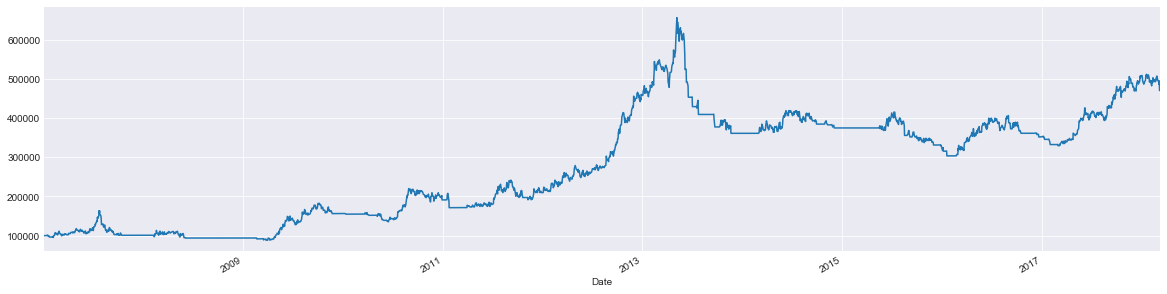

In [125]:
df_res['portfolio_value'].plot()

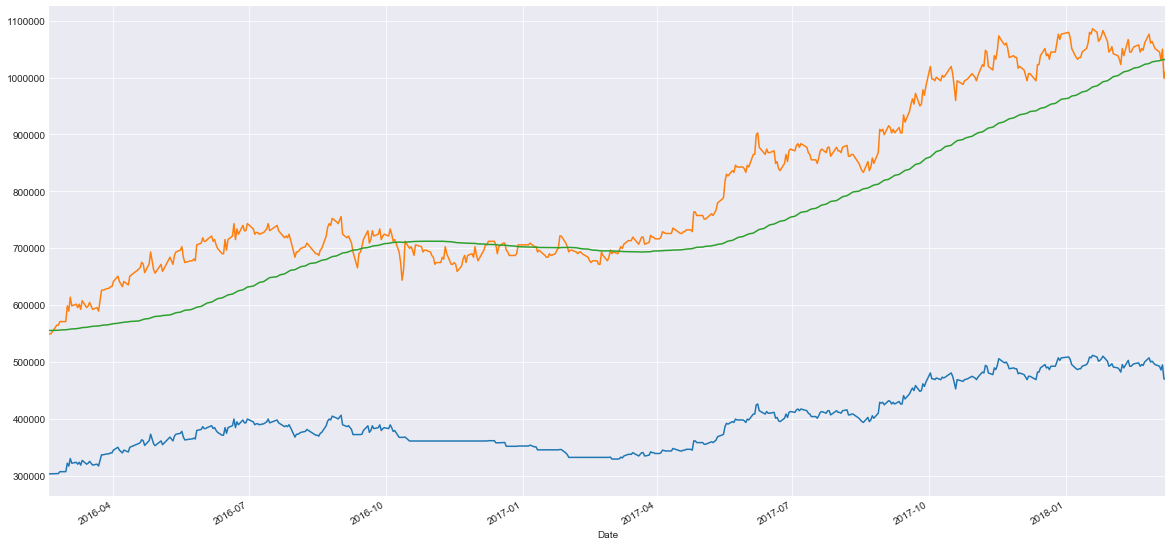

In [127]:
plt.figure(figsize=(20,10))
N=500
df_res['portfolio_value'].tail(N).plot()
tmp1.tail(N).plot()
tmp2.tail(N).plot()

In [109]:
np.mean(ret)/np.std(ret)*np.sqrt(252)

0.9646143787752697